# Demo de Scoring y Motores de IA para MLS
---
---
##  Descripción

En este cuaderno se presenta una simulación de cómo un sistema de **scoring de clientes**, basado en variables transaccionales y de comportamiento digital, puede ser utilizado para segmentar usuarios y ofrecer recomendaciones personalizadas dentro de una aplicación.

El objetivo es demostrar cómo, a partir de datos simples y un proceso de puntuación ponderada, es posible construir **perfiles de clientes**, identificar grupos con comportamientos similares mediante **modelos de segmentación no supervisada (K-Means)**, y generar acciones automáticas, como recomendaciones dentro de la app.

Este enfoque sienta las bases para integrar **motores de inteligencia artificial** más avanzados orientados a la predicción, la personalización y la automatización de decisiones estratégicas.

---

Saving AI_Data.jpg to AI_Data (2).jpg


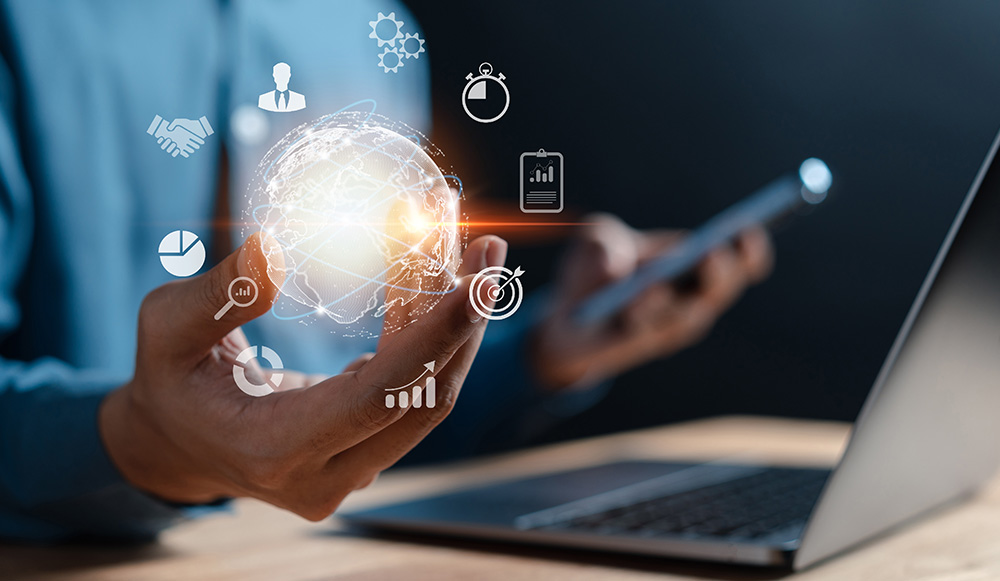

In [ ]:
#@title Scoring e IA { display-mode: "form" }
from google.colab import files
from IPython.display import Image

uploaded = files.upload()
Image('AI_Data.jpg')

## Marco teórico
---
(Explicación breve de la suma ponderara como solución y breve explicación de los motores de IA) - Sacar todo directamente de la propuesta.

### Cálculo de Puntajes Mediante Suma Ponderada

Para evaluar a los clientes según su comportamiento, se propuso una métrica basada en una **suma ponderada** de variables transaccionales y digitales. Esta técnica asigna un peso $w_j $ a cada variable $ x_j $, y calcula un puntaje total para cada cliente $ i $ mediante la siguiente fórmula:

$$
S_i = \sum_{j=1}^{n} w_j \cdot x_{ij}
$$

Donde:

- $ S_i $: Puntaje total del cliente $ i $,
- $ x_{ij} $: Valor normalizado de la variable $ j $ para el cliente $ i $,
- $ w_j $: Peso asignado a la variable $ j $,
- $ n $: Número total de variables consideradas.

Este enfoque permite reflejar el **valor relativo** de cada variable en el cálculo del puntaje final, de acuerdo con la importancia estratégica que define la organización. Las variables van a poder ser modeladas con curvas.

Esta mecánica de ajuste continuo permite que se puedan desarrollar herramientas de
predicción, capaces de predecir si un cliente desempeñará algún comportamiento de
interés como lo pueden ser:
- Adquirir un préstamo o crédito.
- Realizar un reempeño.
- Comprar algún producto en stock.
- Entre otras funcionalidades.

## Ejemplo propuesto
---
Para este cuaderno se considerará que a MLS le interesa clasificar a sus clientes según su transaccionalidad y comportamiento digital. PAra tales fines se considerarán los sigueintes aspectos relevantes como variables del modelado:

**Variables Transaccionales**
- Colocación en MXN
- Cargo en %
- Frecuencia de empeño en días
- Tipo de artículo empeñado (relojes, alhajas, celulares o electronicos)

**Variables de Comportamiento Digital**
- Onboarding en booleano (Cierto o Falso)
- Cantidad pagada a través de la app en MXN
- Referenciación en número de personas (Entero)
- Obtención de crédito digital en booleano (Cierto o Falso)

Estas variables a su vez tienen una importancia relativa, la cual se cuantificará en una ponderación que refleje las preferencias de MLS. Esta ponderación se puede ver explícitamente en la siguiente relación:

**Variables Transaccionales**
- Colocación - 0.6
- Cargo - 0.3
- Frecuencia de empeño - 0.1
- Tipo de artículo empeñado - 0.2

**Variables de Comportamiento Digital**
- Onboarding - 0.2
- Cantidad pagada a través de la app - 0.5
- Referenciación - 0.5
- Obtención de crédito digital - 0.7

A partir de estas variables y ponderaciones, se generará un conjunto de datos simulados que permitirá ilustrar el funcionamiento del sistema de evaluación propuesto. Cada cliente recibirá dos puntajes: uno correspondiente a su comportamiento transaccional y otro a su comportamiento digital.

Posteriormente, se aplicará un algoritmo de segmentación (K-Means) para agrupar a los clientes según sus puntajes, y se construirá un perfil de cada segmento utilizando los promedios de sus características principales. Esto permitirá identificar distintos tipos de clientes y apoyar la toma de decisiones estratégicas por parte de MLS.

Luego se generará un motor de predicción para alguna variable de interés.


## 1. Importaciones

In [ ]:
# Importaciones
import utils

## 2. Carga de datos

In [ ]:
df = utils.generate_mls_dataframe(n=500)
df.head()

,numero_de_contrato,colocacion_mxn,cargo_pct,frecuencia_empeno_dias,tipo_articulo,onboarding,pago_app_mxn,referenciacion,credito_digital
0,25795,8526.32,19.32,115,electronico,1,4122.67,4,1
1,10860,721.08,18.18,18,celular,0,371.20,3,1
2,86820,8237.45,5.54,88,electronico,0,1131.76,3,1
3,64886,3177.62,9.44,134,reloj,1,3651.23,2,0
4,16265,1622.57,9.62,74,reloj,1,2994.04,4,0


## 3. Análsis Exploratorio de Datos

### Análisis Exploratorio

Realizamos un análisis exploratorio automático sobre el DataFrame, con el objetivo de obtener una comprensión inicial de los datos. Incluye lo siguiente:

- **Tamaño del DataFrame** (filas y columnas)
- **Tipos de datos** de cada columna
- **Valores faltantes** por columna
- **Resumen estadístico** para columnas numéricas (media, desviación estándar, mínimo, máximo, percentiles)
- **Frecuencias de valores** para variables categóricas o booleanas
- **Histogramas** para observar la distribución de cada variable numérica
- **Pairplot** para visualizar relaciones entre variables numéricas (correlaciones, grupos, etc.)

Esta visualización permite detectar patrones generales, rangos extremos, agrupamientos y relaciones entre variables antes de aplicar técnicas más complejas.


 --- Resultados Análisis Exploratorio ---

 Shape: (500, 9)

Tipos de Columnas:
numero_de_contrato          int64
colocacion_mxn            float64
cargo_pct                 float64
frecuencia_empeno_dias      int64
tipo_articulo              object
onboarding                  int64
pago_app_mxn              float64
referenciacion              int64
credito_digital             int64
dtype: object

 Valores Faltantes:
numero_de_contrato        0
colocacion_mxn            0
cargo_pct                 0
frecuencia_empeno_dias    0
tipo_articulo             0
onboarding                0
pago_app_mxn              0
referenciacion            0
credito_digital           0
dtype: int64

 Resumen:


,count,mean,std,min,25%,50%,75%,max
numero_de_contrato,500.0,55825.00600,26748.293127,10206.00,32596.2500,58379.000,77983.5000,99912.00
colocacion_mxn,500.0,5251.69592,2784.209093,544.00,2797.5125,5234.845,7685.8900,9997.32
cargo_pct,500.0,15.11556,5.948857,5.13,9.6675,15.520,20.3475,24.96
frecuencia_empeno_dias,500.0,93.20200,52.089998,5.00,48.0000,93.000,140.0000,179.00
onboarding,500.0,0.47000,0.499599,0.00,0.0000,0.000,1.0000,1.00
pago_app_mxn,500.0,2530.46728,1450.710392,10.52,1277.9700,2639.510,3770.8675,4998.57
referenciacion,500.0,2.07400,1.460407,0.00,1.0000,2.000,3.0000,9.00
credito_digital,500.0,0.52000,0.500100,0.00,0.0000,1.000,1.0000,1.00



 Columnas Categóricas/Booleanas:

▶ tipo_articulo:
tipo_articulo
electronico    134
reloj          129
alhaja         121
celular        116
Name: count, dtype: int64

 Histograms:


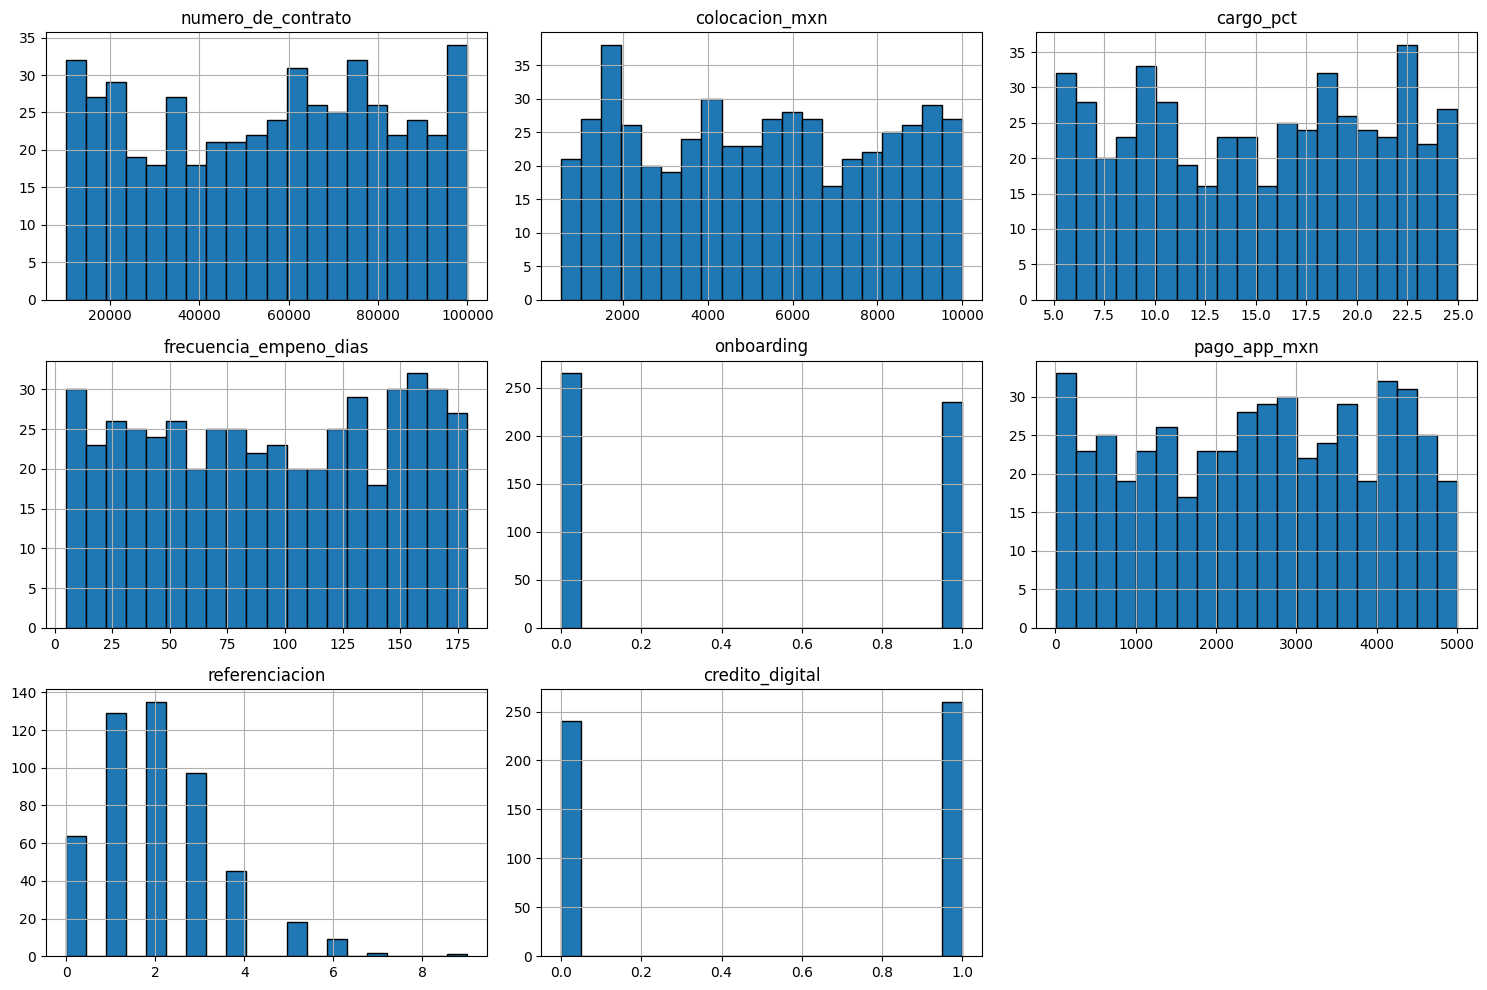


🔗 Pairplot (subset of numerical features):


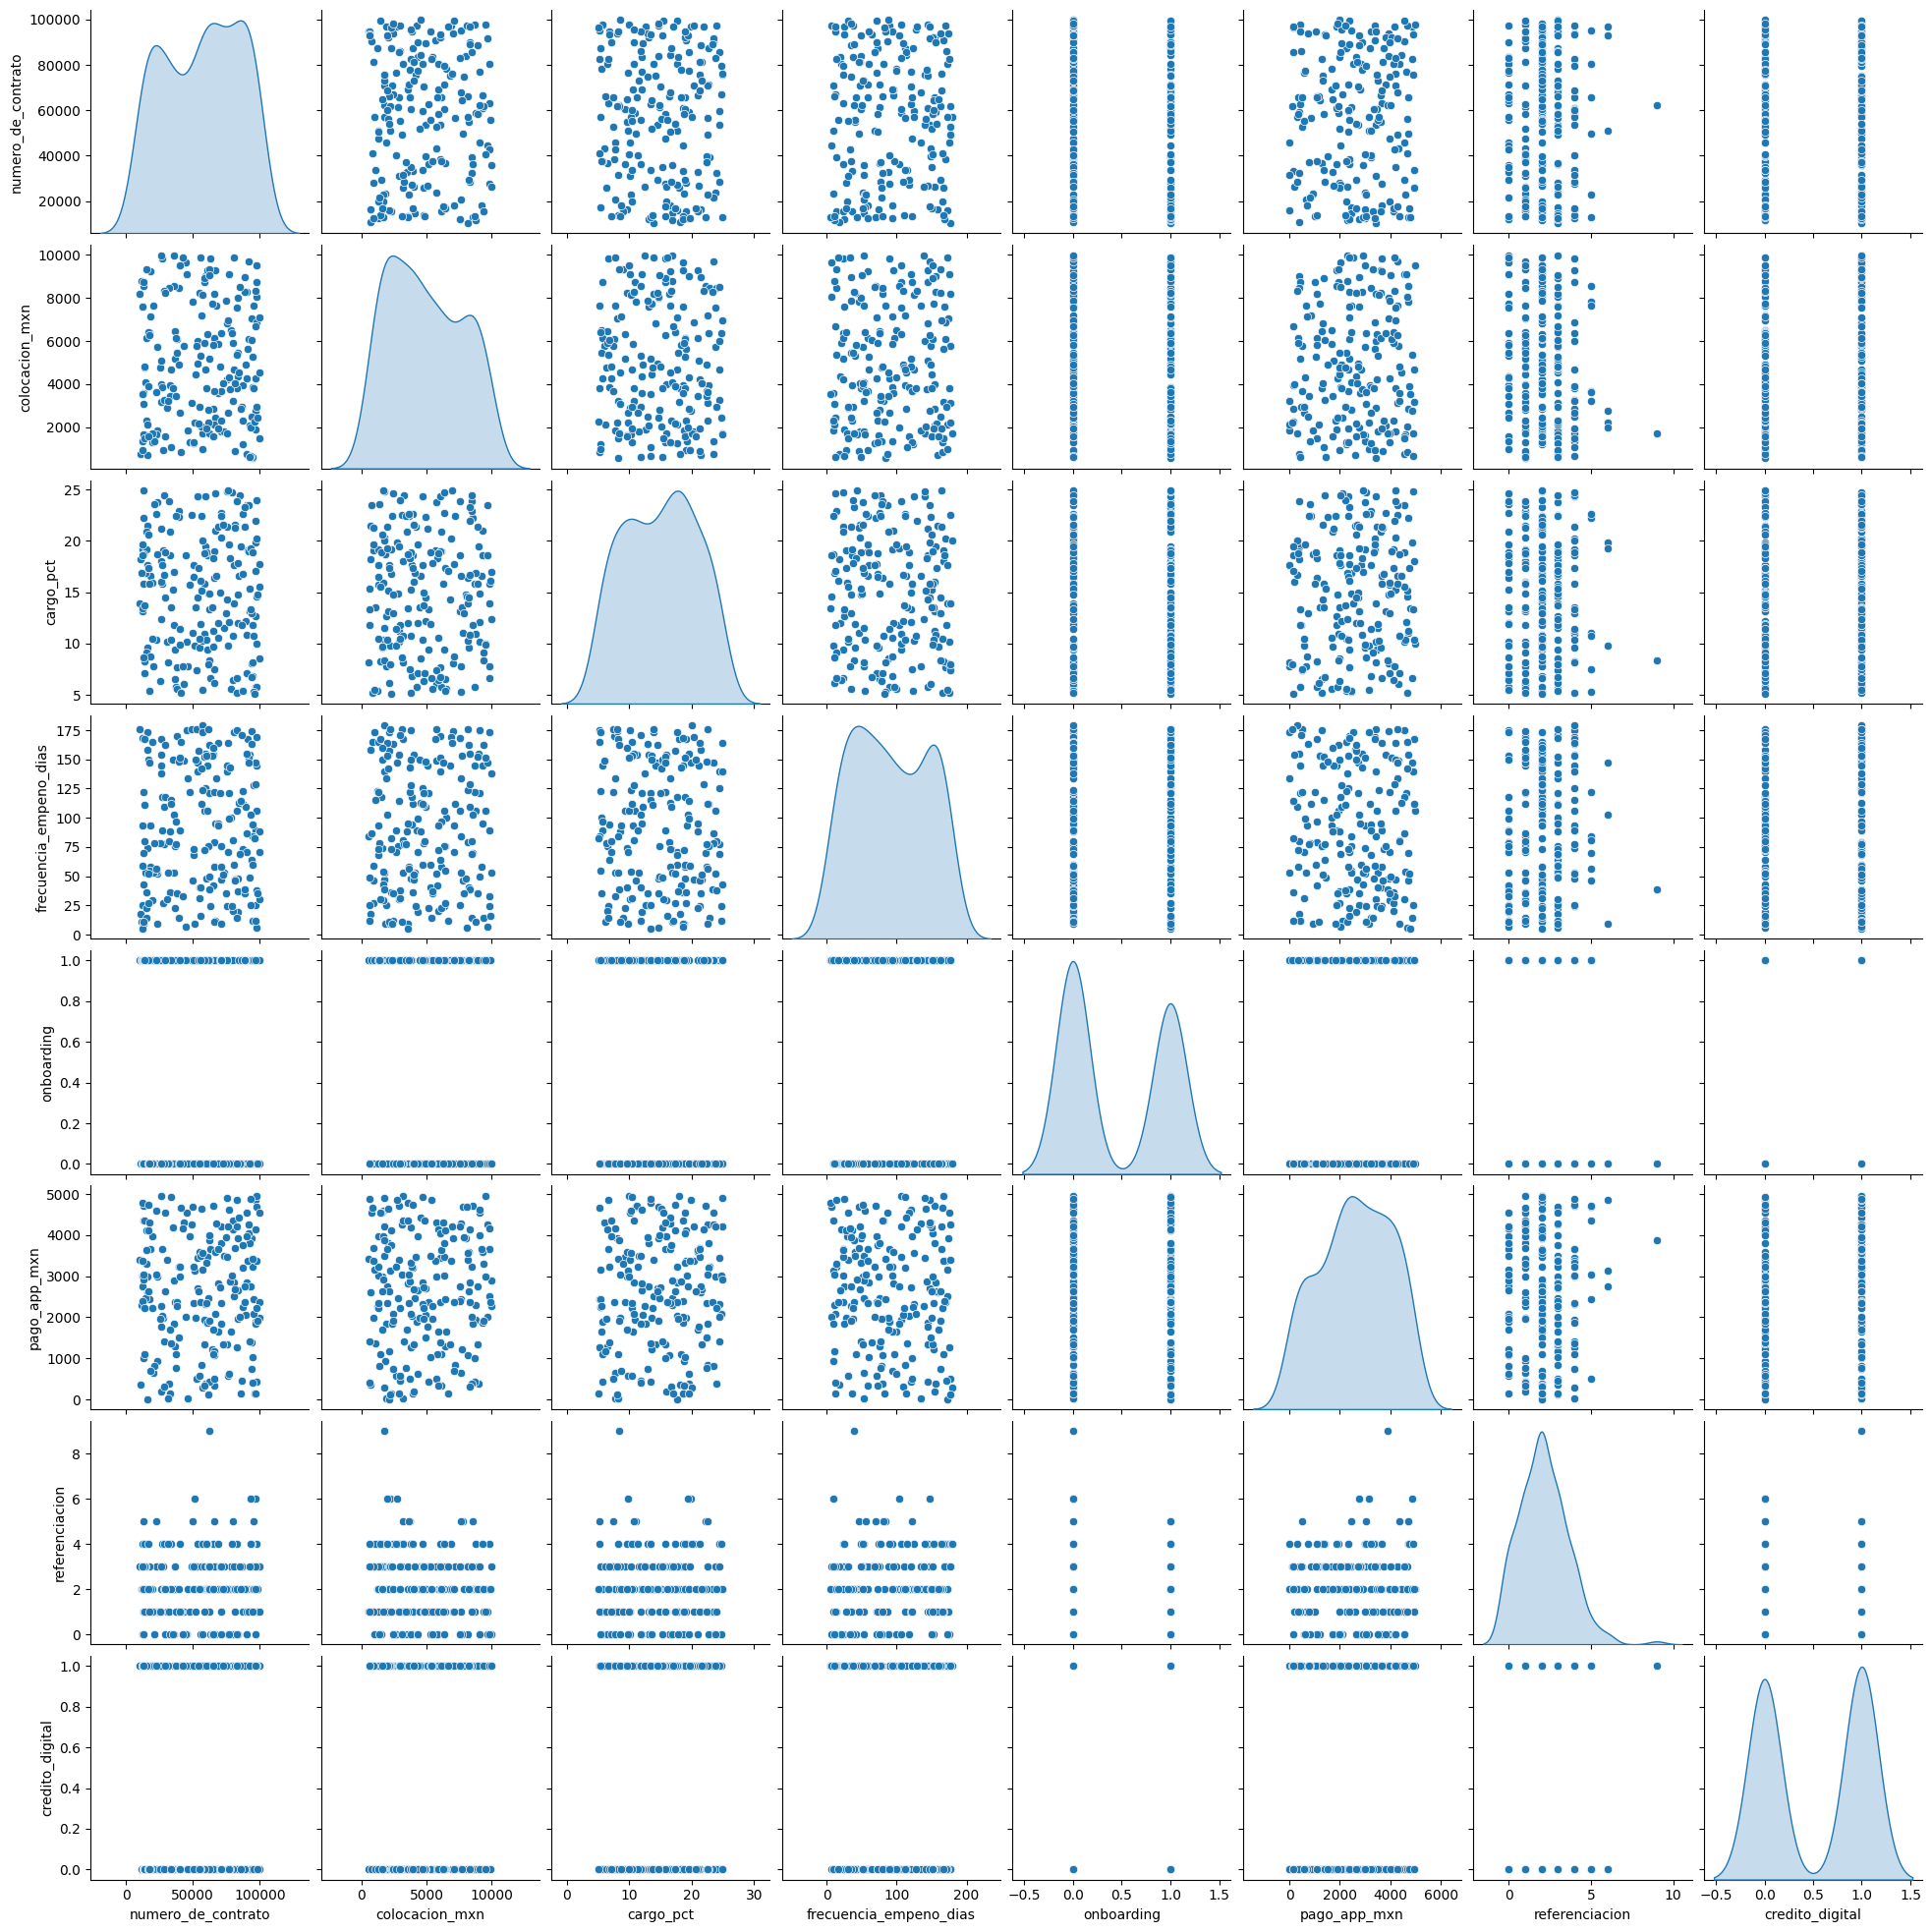


 Análisis Exploratorio Completado .



In [ ]:
utils.quick_eda(df)

## 4. Scoring de Transacción

In [ ]:
# Define transactional variables and weights
trans_vars = ["colocacion_mxn", "cargo_pct", "frecuencia_empeno_dias", "tipo_articulo"]
trans_weights = {
    "colocacion_mxn": 0.9,
    "cargo_pct": 0.3,
    "frecuencia_empeno_dias": 0.6,
    "tipo_articulo": 0.1  # Optional: remove if weakly informative
}

In [ ]:
df = utils.compute_weighted_score(df, trans_vars, trans_weights, score_name="score_transaccional")

## 5. Scoring de Comportamiento

In [ ]:
# Digital behavior score
digital_vars = ["onboarding", "pago_app_mxn", "referenciacion", "credito_digital"]
digital_weights = {
    "pago_app_mxn": 0.9,
    "credito_digital": 0.3,
    "referenciacion": 0.6,
    "onboarding": 0.1
}

In [ ]:
df = utils.compute_weighted_score(df, digital_vars, digital_weights, score_name="score_digital")

In [ ]:
df.head()

,numero_de_contrato,colocacion_mxn,cargo_pct,frecuencia_empeno_dias,tipo_articulo,onboarding,pago_app_mxn,referenciacion,credito_digital,score_transaccional,score_digital
0,25795,8526.32,19.32,115,electronico,1,4122.67,4,1,1.420606,1.408627
1,10860,721.08,18.18,18,celular,0,371.20,3,1,0.292448,0.565078
2,86820,8237.45,5.54,88,electronico,0,1131.76,3,1,1.091528,0.702307
3,64886,3177.62,9.44,134,reloj,1,3651.23,2,0,0.860765,0.890231
4,16265,1622.57,9.62,74,reloj,1,2994.04,4,0,0.508543,0.904987


## 6. Segmentación y perfilado

In [ ]:
# Segmentación con k-means, y perfilado con los prototipos de los clusters
features = ["score_transaccional", "score_digital"]
df_segmented, prototypes = utils.segment_and_profile(df, features, n_clusters=5)

In [ ]:
prototypes

,colocacion_mxn,cargo_pct,frecuencia_empeno_dias,onboarding,pago_app_mxn,referenciacion,credito_digital,score_transaccional,score_digital
cluster,,,,,,,,,
0,2499.460000,13.669783,59.326087,0.478261,3397.158913,2.402174,0.641304,0.546536,1.011418
1,4930.862458,14.769068,92.627119,0.466102,2247.252881,2.033898,0.483051,0.918180,0.730695
2,7805.470947,17.022737,128.715789,0.410526,1578.287368,1.821053,0.484211,1.352589,0.590593
3,6655.454417,15.952667,108.858333,0.583333,3923.509667,2.425000,0.691667,1.157869,1.133526
4,3651.754667,13.679067,65.626667,0.360000,890.142933,1.493333,0.200000,0.684488,0.354267


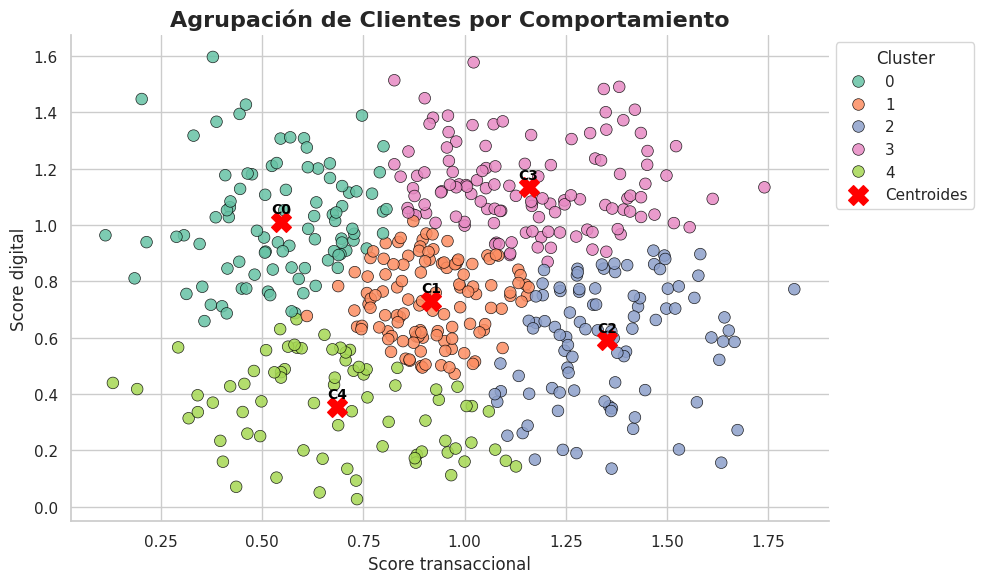

In [ ]:
# Visualizar clustering
utils.plot_clusters(
    df_segmented,
    title="Agrupación de Clientes por Comportamiento"
)

## 7. Motor de IA

In [ ]:
import gradio as gr

with gr.Blocks() as demo:
    gr.Markdown("## 📲 Simulación de Recomendación Personalizada para Clientes MLS")

    resumen_box = gr.Textbox(label="📄 Información del Cliente", lines=5)
    mensaje_box = gr.Textbox(label="💬 Recomendación", lines=3)

    generar_btn = gr.Button("🎲 Simular cliente aleatorio")

    generar_btn.click(fn=lambda: utils.mock_recommendation(df_segmented), outputs=[resumen_box, mensaje_box])

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://21a3214e8b24a44fa8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


---
---
## Conclusiones

1. **Estandarización del comportamiento del cliente**  
   La implementación de un sistema de scoring permite traducir múltiples variables heterogéneas (transaccionales y digitales) en métricas numéricas comparables. Esto genera una representación uniforme del comportamiento del cliente, lo que facilita su análisis, segmentación y posterior uso en modelos predictivos.

2. **Base sólida para la personalización inteligente**  
   Al asociar cada cliente con un segmento de comportamiento mediante clustering, es posible generar recomendaciones personalizadas dentro de la app, ajustadas al perfil transaccional y digital de cada usuario. Este enfoque abre la puerta a experiencias más relevantes, con mayor probabilidad de conversión y retención.

3. **Punto de partida para modelos supervisados**  
   El score transaccional y digital puede utilizarse como *feature engineering* en modelos supervisados que busquen predecir eventos como el abandono, la adquisición de productos, o la recurrencia. Además, los segmentos obtenidos por clustering pueden servir como etiquetas objetivo o como variables explicativas adicionales.
